Clustering is the process of grouping a set of objects into clusters so that the objects in each cluster are more similar to each other than to objects in other clusters. Clustering is a common technique for data analysis and machine learning, and it can be used to find patterns and structure in data.
There are many different clustering algorithms, each with its own strengths and weaknesses. Some of the most common clustering algorithms include k-means clustering, hierarchical clustering, and density-based clustering.
K-means clustering is a simple and efficient clustering algorithm that works by partitioning a set of objects into k clusters, where k is a user-specified parameter. The algorithm starts by randomly selecting k objects as cluster centers. Then, each object is assigned to the cluster center that it is most similar to. The cluster centers are then updated to be the average of the objects in each cluster. This process is repeated until the cluster centers no longer change.
Hierarchical clustering is a bottom-up clustering algorithm that works by recursively merging clusters together. The algorithm starts by creating a cluster for each object. Then, the two most similar clusters are merged together. This process is repeated until there is only one cluster left.
Density-based clustering is a clustering algorithm that works by finding dense regions of objects in a dataset. The algorithm starts by creating a cluster for each object. Then, the algorithm iteratively adds objects to clusters if they are within a certain distance of an existing cluster. This process is repeated until no more objects can be added to any cluster.
Clustering can be used for a variety of purposes, including:
* Finding patterns and structure in data
* Identifying outliers
* Reducing the dimensionality of data
* Building predictive models
Clustering is a powerful tool for data analysis and machine learning. However, it is important to choose the right clustering algorithm for the specific task at hand.

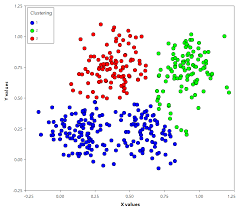

In above example x-axis is students and y-axis is attendance. The dark blue cluster represents students a group of students whose attendance is less and that is why they have less understanding of the subject matter. The second cluster in red color represents students who attend the class but dont have understanding of the subject matter because they dont have it background. The green cluster represent students who has it background and has high attendance and they have good understanding of the subject matter. The last cluster shows students who does not have high attendance but still doing good in class because they are either very smart or they have it background.

# K-Means Clustering

In [2]:
# importing libararies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# import dataset
dataset = pd.read_csv('Mall_Customers.csv')
X = dataset.iloc[:, [3, 4]].values

In [4]:
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


# Using the elbow method to find the optimal number of clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

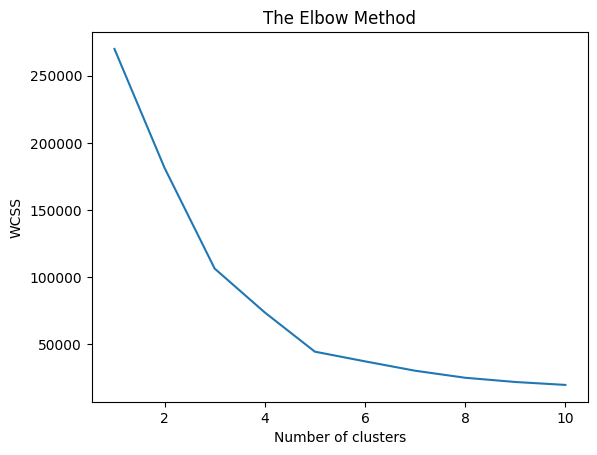

In [5]:
from sklearn.cluster import KMeans
wcss = [] #WCSS is defined as the sum of the squared distance between each member of the cluster and its centroid.
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Training the K-Means model on the dataset

In [6]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# Visualising the clusters

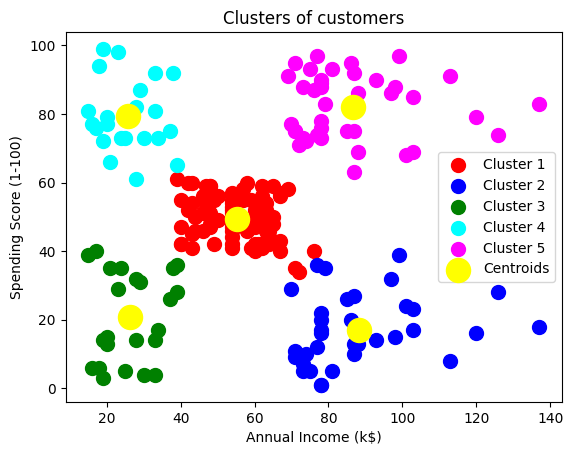

In [7]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()